# EVI (Enhanced Vegetation Index)

"EVI" stands for "Enhanced Vegetation Index", which is a remote sensing index used to quantify vegetation cover and photosynthetic activity. In the context of mangrove analysis, EVI can be used to assess the health and productivity of mangrove forests.

Mangroves are unique ecosystems that grow in saline coastal environments and play a critical role in carbon sequestration, coastal protection, and biodiversity conservation. However, mangroves are under threat from various factors such as deforestation, pollution, and climate change. Remote sensing tools like EVI can help in monitoring and managing mangrove forests.

EVI is calculated using near-infrared, blue, and red wavelengths of light, which are sensitive to vegetation density, leaf pigments, and canopy structure. The formula for calculating EVI is:

EVI = 2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))

where NIR is the near-infrared reflectance, RED is the red reflectance, and BLUE is the blue reflectance.

By analyzing EVI values over time, researchers and conservationists can track changes in mangrove health and productivity. High EVI values indicate healthy and productive mangrove forests, while low EVI values may indicate stress, damage, or disturbance to the mangroves.

Overall, EVI is a useful tool for analyzing mangrove ecosystems and can provide valuable information for conservation and management efforts.

---------------------------------------------------------------

The optimal range of EVI values for mangroves can vary depending on various factors such as species composition, environmental conditions, and management practices. However, in general, high EVI values are indicative of healthy and productive mangrove forests, while low EVI values can indicate stress, damage, or disturbance to the mangroves.

The specific threshold values for "good" or "bad" EVI ranges for mangroves may depend on the specific study or application, but here are some general guidelines:

1. High EVI values: Values above 0.5 are generally considered good for mangroves, indicating high photosynthetic activity and healthy vegetation cover.

2. Moderate EVI values: Values between 0.3 and 0.5 may indicate moderate photosynthetic activity and vegetation cover, but could also indicate some level of stress or disturbance to the mangroves.

3. Low EVI values: Values below 0.3 are generally considered poor for mangroves, indicating low photosynthetic activity and poor vegetation cover. This could be due to factors such as deforestation, pollution, or natural disasters.

It is important to note that EVI should be used in combination with other data sources and ground-truthing to fully understand the status and health of mangrove forests. Remote sensing data alone cannot provide a complete picture of the complex ecological and socio-economic factors that affect these ecosystems.

------------------------------------------------------------------

EVI is helpful in mangrove analysis because it provides a way to quantify the health and productivity of mangrove forests using remote sensing data. Here are some ways in which EVI can be useful in mangrove analysis:

    Measuring vegetation cover: Mangrove forests are composed of dense vegetation cover, which can be difficult to quantify using traditional satellite images. However, EVI is sensitive to vegetation density, and can provide a more accurate measure of mangrove cover than other indices like the Normalized Difference Vegetation Index (NDVI).

    Assessing canopy structure: The structure of the mangrove canopy can affect the amount of light that reaches the forest floor, which in turn affects the growth and productivity of the mangroves. EVI is sensitive to canopy structure, and can provide information on the vertical and horizontal distribution of vegetation cover in the mangroves.

    Monitoring changes over time: Mangroves are under threat from various factors such as deforestation, pollution, and climate change. EVI can be used to track changes in mangrove health and productivity over time, allowing researchers and conservationists to identify areas that may be at risk and take appropriate action to protect them.

    Identifying stress and damage: Low EVI values can indicate stress, damage, or disturbance to the mangroves. This could be due to factors such as natural disasters, pollution, or human activity. By identifying areas with low EVI values, conservationists can focus their efforts on protecting and restoring these areas.

Overall, EVI provides a way to assess the health and productivity of mangrove forests using remote sensing data, and can be a useful tool for monitoring and managing these important ecosystems.





In [1]:
%matplotlib inline

import datacube
from deafrica_tools.plotting import rgb, display_map
import datacube
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog

from deafrica_tools.plotting import display_map, rgb
dc = datacube.Datacube(app="04_Plotting")
#15.85828652, 80.78694696
#15.75418332, 81.02203692
lat_range = (15.75418332, 15.85828652)
lon_range = (80.78694696, 81.02203692)
time_range = ('2022-01-15', '2023-02-15')
#display_map(x=lon_range, y=lat_range)
ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["B04_10m","B03_10m","B02_10m", "B08_10m","B11_20m","B12_20m"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-30, 30))

print(ds)

<xarray.Dataset>
Dimensions:      (time: 2, y: 427, x: 757)
Coordinates:
  * time         (time) datetime64[ns] 2022-08-23T05:14:41.977841 2023-02-09T...
  * y            (y) float64 1.998e+06 1.998e+06 ... 1.985e+06 1.985e+06
  * x            (x) float64 7.795e+06 7.795e+06 ... 7.817e+06 7.818e+06
    spatial_ref  int32 6933
Data variables:
    B04_10m      (time, y, x) uint16 1609 1571 1573 1567 ... 1290 1267 1264 1252
    B03_10m      (time, y, x) uint16 2022 1978 1971 1972 ... 1612 1575 1578 1531
    B02_10m      (time, y, x) uint16 1468 1495 1473 1470 ... 1524 1468 1525 1489
    B08_10m      (time, y, x) uint16 4510 4596 4372 4512 ... 1136 1137 1138 1150
    B11_20m      (time, y, x) uint16 2530 2521 2499 2485 ... 1092 1092 1091 1089
    B12_20m      (time, y, x) uint16 1666 1668 1656 1637 ... 1069 1068 1070 1068
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


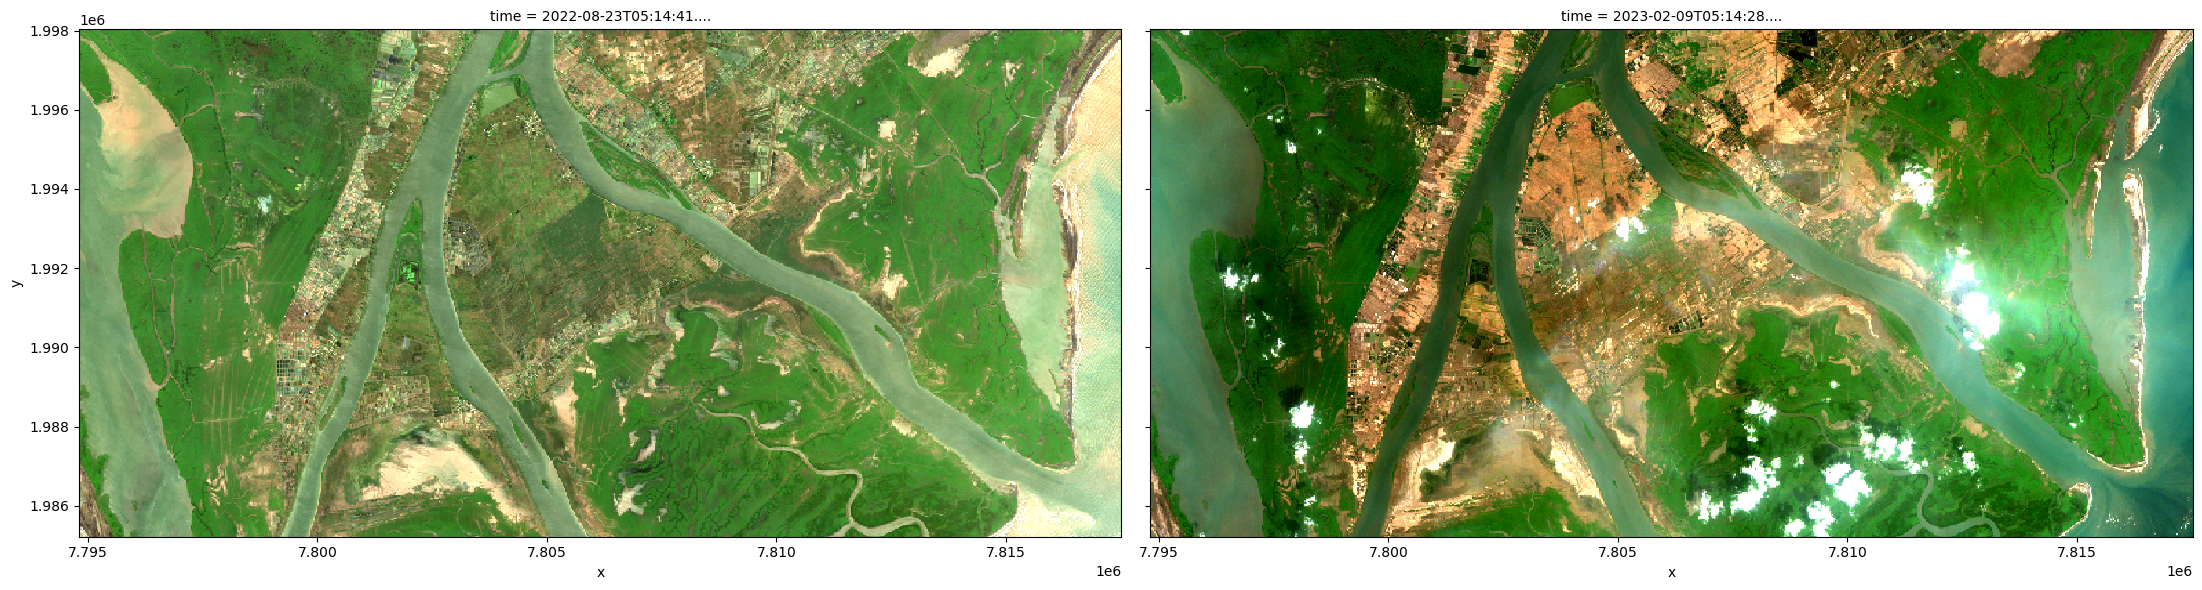

In [2]:
# Load the data from the Datacube
dataset = ds

rgb(ds, bands=[ 'B04_10m', 'B03_10m','B02_10m'], index=[0, 1])

In [3]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(ds)


# Calculate EVI and store it as a measurement in the original dataset
EVI = 2.5 * ((dataset.B08_10m - dataset.B04_10m) / (dataset.B08_10m + 6 * dataset.B04_10m - 7.5 * dataset.B02_10m + 1))
print(EVI)

<xarray.DataArray (time: 2, y: 427, x: 757)>
array([[[  2.298732  ,   2.690802  ,   2.532115  , ...,   0.5692675 ,
           0.64544916,   0.47821465],
        [  2.4733999 ,   2.4113364 ,   2.3801866 , ...,   0.49388525,
           0.48936683,   0.3846154 ],
        [  2.4706695 ,   2.2192075 ,   1.9307576 , ...,   0.37099972,
           0.59159064,   0.12962075],
        ...,
        [ -2.087542  ,  -5.903084  ,  -2.531915  , ...,   0.459681  ,
           1.0782747 ,   6.2966805 ],
        [ -1.7384518 ,  -1.4321734 ,  -1.5406007 , ...,   0.93099463,
           0.940491  ,   4.431487  ],
        [ -3.381612  ,  -1.5859156 ,  -2.7588236 , ...,  -1.5131321 ,
          24.078949  ,   7.979684  ]],

       [[  2.746785  ,   2.565629  ,   2.7463732 , ...,   0.61808777,
           0.526592  ,   0.4522981 ],
        [  2.7309144 ,   2.6242828 ,   2.7320447 , ...,   0.51289237,
           0.4525451 ,   0.4299401 ],
        [  2.8517919 ,   2.939068  ,   2.8519452 , ...,   0.28927428,
      

<Figure size 2000x2000 with 0 Axes>

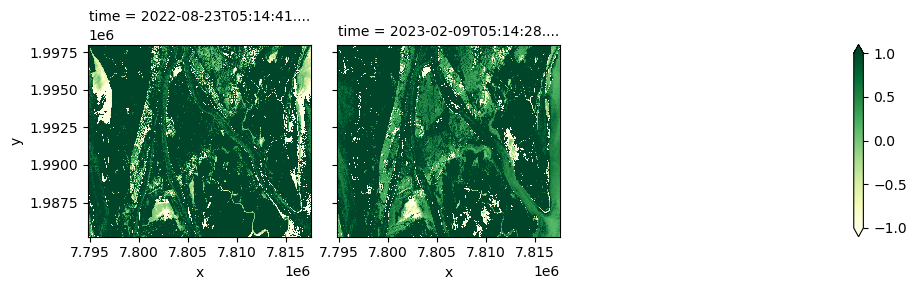

In [4]:
plt.figure(figsize=(20, 20))
EVI.plot(col='time', cmap="YlGn", vmin=-1, vmax=1, col_wrap=3)
plt.show()

## Mangrove Analysis using EVI 

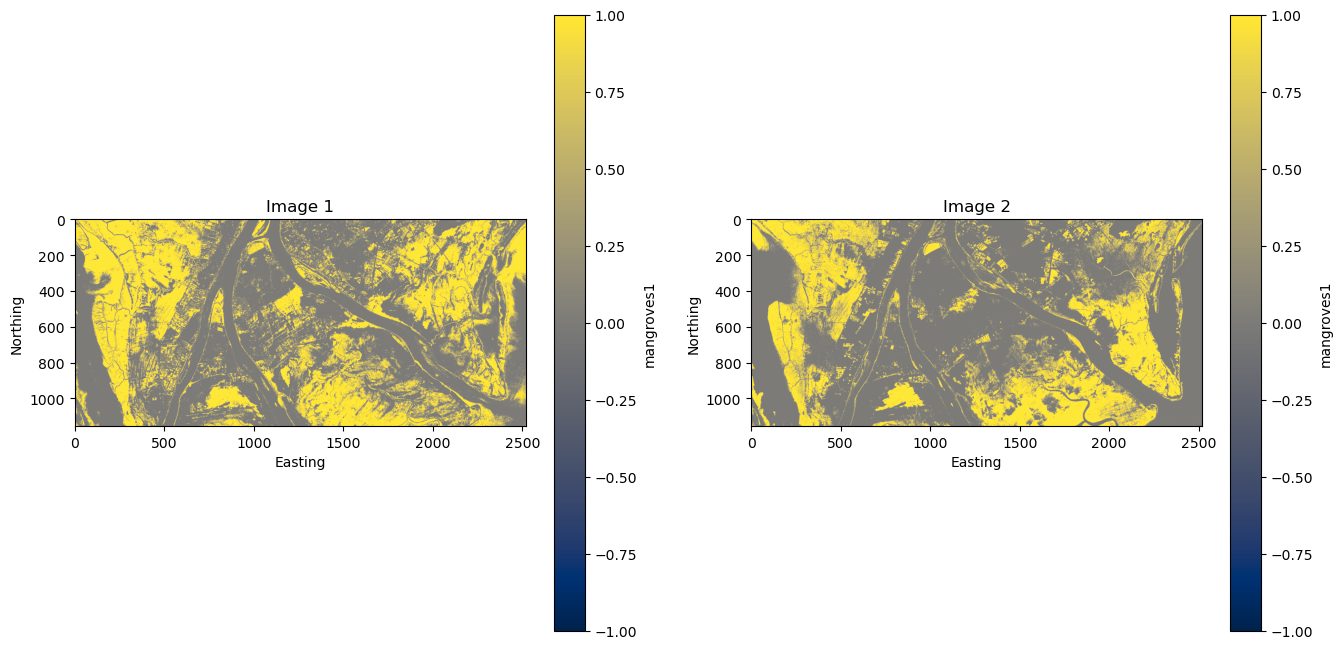

In [5]:
import datacube
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl

# Connect to the datacube
dc = datacube.Datacube(app='ndvi_example')

# Define the query parameters
query = {
    'lat': (15.75418332, 15.85828652),
    'lon': (80.78694696, 81.02203692),
    'time': ('2022-01-15', '2023-02-15'),
    'measurements': ['B04_10m', 'B03_10m', 'B02_10m', 'B08_10m', 'B11_20m', 'B12_20m'],
    'product': 's2a_sen2cor_granule',
    'output_crs': 'EPSG:32644',
    'resolution': (-10, 10)
}

# Load the data
ds = dc.load(**query)

# Compute the EVI
EVI = 2.5 * ((ds.B08_10m - ds.B04_10m) / (ds.B08_10m + 6 * ds.B04_10m - 7.5 * ds.B02_10m + 1))

vegetation = np.where(EVI> 2.25, 1, 0)
# Create a colormap
#cmap = plt.get_cmap('YlGn')

cmap1 = (mpl.colors.ListedColormap(['#f55b31','#b8c0be', '#f905c5', '#169cf8','#f94f05', '#17d517'])
        .with_extremes(over='green', under='blue'))

bounds = [-1.0,-0.75, -0.5, 0.0, 0.5,0.75, 1.0]

# Plot each image separately
fig, axs = plt.subplots(ncols=2, figsize=(16, 8))
for i, ax in enumerate(axs.flat):
    im = ax.imshow(vegetation[i], cmap='cividis', vmin=-1, vmax=1) #PiYG
    ax.set_title('Image {}'.format(i+1))
    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('mangroves1')

# Show the plot
plt.show()